<a href="https://colab.research.google.com/github/BiancadeFrancisco/Sarimax_acoesApple/blob/main/S%C3%89RIES_ATEMPORAIS_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCICIO SÉRIE ATEMPORAL, UTILIZANDO O MÉTODO SARIMAX COM VARIÁVEIS EXÓGENAS


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
price = pd.read_csv("/content/price.csv", sep=",")
price.head()

# DADOS REFERENTE Á AÇÕES DA APPLE
# OPEN (preço que abriu o dia), CLOSE (preço que fechou o dia), LOW (< preço do dia), HIGH (> preço do dia), ADJ (preço ajustado), VOLUME (ações vendidas)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000


In [ ]:
# CRIAR VARIÁVEL PARA A MÉDIA ENTRE O PREÇO MÁX (HIGHT) E O PREÇO MIN (LOW)

price["Mean"] = (price["Low"] + price["High"])/2
price.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200,3.327143
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000,3.400893


In [ ]:
# CRIEI UMA COLUNA (ACTUAL), QUE TRAZ OS VALORES DA COLUNA MÉDIA DE UM DIA APÓS, SERÁ NOSSA VARIÁVEL TARGET (Y) FUTURA:

steps = -1
price_for_prediction = price.copy()
price_for_prediction["Actual"] = price_for_prediction["Mean"].shift(steps)
price_for_prediction.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200,3.327143,3.400893
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000,3.400893,3.250179


In [ ]:
# EXCLUIR VALORES NULOS DO NOVO DATASET:

price_for_prediction = price_for_prediction.dropna()

In [ ]:
price_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2766 entries, 0 to 2765
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2766 non-null   object 
 1   Open       2766 non-null   float64
 2   High       2766 non-null   float64
 3   Low        2766 non-null   float64
 4   Close      2766 non-null   float64
 5   Adj Close  2766 non-null   float64
 6   Volume     2766 non-null   int64  
 7   Mean       2766 non-null   float64
 8   Actual     2766 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 216.1+ KB


In [ ]:
# TRANSFORMAR COLUNA DATE EM DATETIME E DEIXÁ-LA COMO INDEX:

price_for_prediction["Date"] = pd.to_datetime(price_for_prediction["Date"])
price_for_prediction.index = price_for_prediction["Date"]

In [ ]:
price_for_prediction.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
Date,,,,,,,,,
2008-10-01,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
2008-10-02,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2008-10-03,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143
2008-10-06,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200,3.327143,3.400893
2008-10-07,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000,3.400893,3.250179


In [ ]:
price_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2766 entries, 2008-10-01 to 2019-09-26
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2766 non-null   datetime64[ns]
 1   Open       2766 non-null   float64       
 2   High       2766 non-null   float64       
 3   Low        2766 non-null   float64       
 4   Close      2766 non-null   float64       
 5   Adj Close  2766 non-null   float64       
 6   Volume     2766 non-null   int64         
 7   Mean       2766 non-null   float64       
 8   Actual     2766 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 216.1 KB


<Axes: xlabel='Date'>

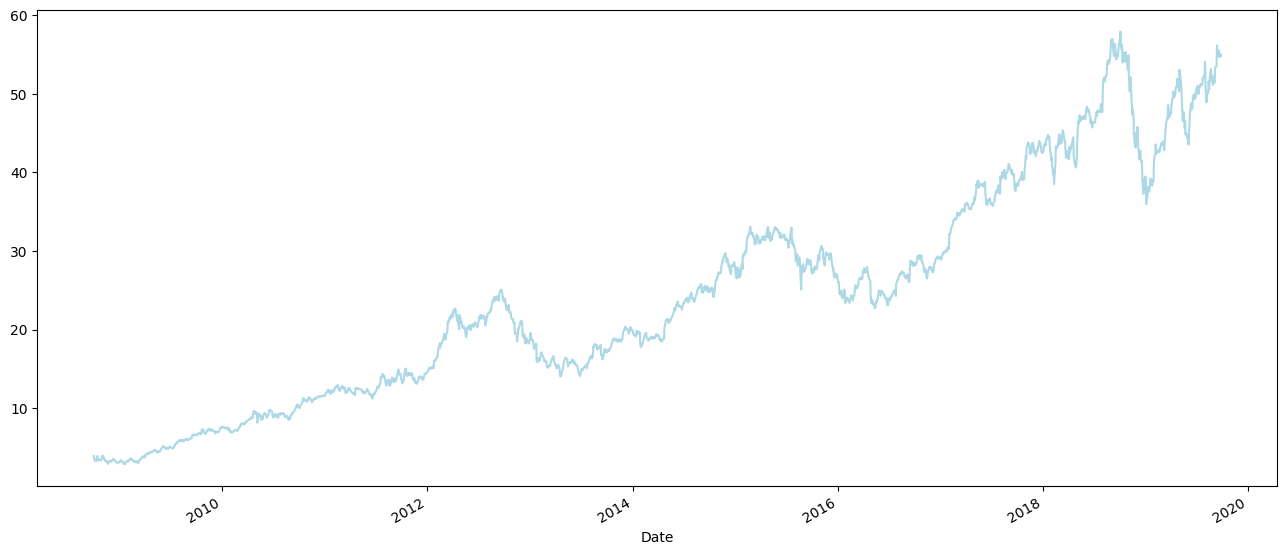

In [ ]:
# FAZER GRÁFICO SIMPLES PARA VER O COMPORTAMENTO DA MÉDIA AO LONGO DO TEMPO

price_for_prediction["Mean"].plot(color="lightblue", figsize=(16,7))

# verificamos que tem uma tendencia de alta

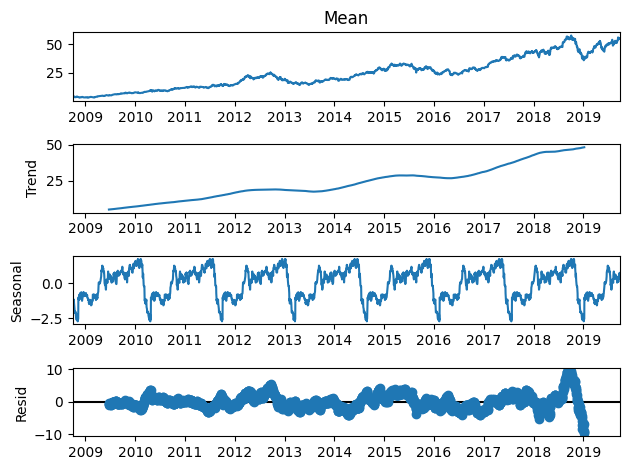

In [ ]:
# ANALISAR A TENDENCIA E SAZONALIDADE:

import statsmodels.api as sm

sd = sm.tsa.seasonal_decompose(price_for_prediction["Mean"], model="add", period = 365); #periodo de um ano
fig = sd.plot()
plt.show()

# podemos ver no gráfico que: existe tendencia de alta, existe uma sazonalidade e o residuo está perto da média.

In [ ]:
# FAZER TRAIN_TEST

from sklearn.preprocessing import MinMaxScaler


# SEPARAR X E Y:

sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(price_for_prediction[["Low", "High","Open", "Close", "Volume", "Adj Close", "Mean"]]) #VARIÁVEIS EXÓGENAS
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(price_for_prediction[["Actual"]]) #VARIÁVEL TARGET
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [ ]:
# RENOMEAR COLUNAS:

X.rename(columns={0:"Low", 1:"High", 2:"Open", 3:"Close", 4:"Volume", 5:"Adj_Close", 6:"Mean"}, inplace=True)
X.index= price_for_prediction.index
X.head(2)


,Low,High,Open,Close,Volume,Adj_Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


In [ ]:
y.rename(columns={0:"Preco_acao"}, inplace=True)
y.index= price_for_prediction.index
y.head(2)

,Preco_acao
Date,
2008-10-01,0.015763
2008-10-02,0.013284


In [ ]:
train_size=int(len(price) *0.7)
test_size = int(len(price)) - train_size

train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [ ]:
!pip install scipy

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
step_wise = auto_arima(train_y,
                       exogenous = train_X,
                       start_p = 1, start_q = 1,
                       max_p = 7, max_q = 7,
                       d = 1, max_d = 7,
                       trace = True,
                       error_action = "ignore",
                       suppress_warnings = True,
                       stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15130.709, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15077.042, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15127.374, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15132.095, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15075.928, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15130.986, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15130.275, Time=2.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15131.797, Time=0.53 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.704 seconds


In [ ]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1936
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7569.047
Date:                Tue, 18 Jul 2023   AIC                         -15132.095
Time:                        10:52:19   BIC                         -15115.391
Sample:                             0   HQIC                        -15125.952
                               - 1936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.414      0.157    -7.4e-05       0.000
ma.L1          0.1723      0.013     13.155      0.000       0.147       0.198
sigma2      2.339e-05   3.08e-07     75.974      0.000    2.28e-05     2.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9198.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [ ]:
# COLOCAR PARA RODAR TUDO DENTRO DO SARIMAX:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y,
               exog=train_X,
               order=(0,1,1),
               enforce_invertibility=False, enforce_stationarity=False)

In [ ]:
results= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)


In [ ]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

In [ ]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])
act.index=test_X.index

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions["Actual"] = act["Preco_acao"]
predictions.rename(columns={0:'Pred'}, inplace=True)

<Axes: xlabel='Date'>

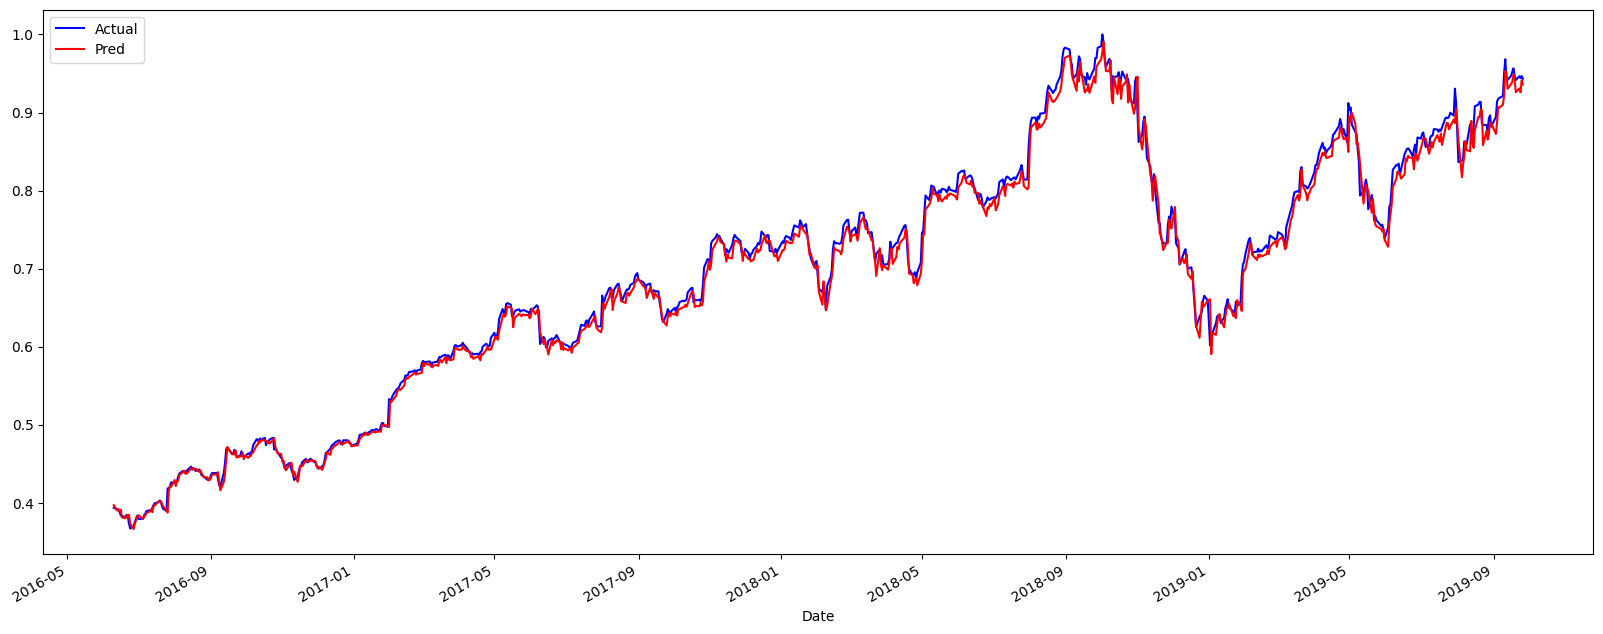

In [ ]:
predictions["Actual"].plot(figsize=(20,8), legend=True, color="blue")
predictions["Pred"].plot(legend=True, color="red", figsize=(20,8))

In [ ]:
# ERRO MEDIO:

from statsmodels.tools.eval_measures import mse
error = mse(predictions["Pred"], predictions["Actual"])
print(error)

# o modelo performou muito bem, com um erro médio muito baixo

0.00013821411633853532
